Actividad 1: Simulación Estocástica

**Curso:** TEMAS SELECTOS 1 (O25-LAT4032-1)  
**Profesor:** Rubén Blancas Rivera  
**Alumno:** 
**Universidad:** Universidad de las Américas Puebla  
**Fecha:** 2025-08-15  
**Ejercicios:** Impares.

# Funciones para graficar

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
def histograma(muestras, montecarlo, bins=50):
    fig, ax = plt.subplots(figsize=(10, 6))
    n, _, _ = ax.hist(muestras, bins=bins, alpha=0.7)
    ax.axvline(montecarlo, color='r', linestyle='--',
               linewidth=2, zorder=3, label=f'Monte Carlo {montecarlo:.4f}')
    xmin, xmax = ax.get_xlim()
    if montecarlo < xmin or montecarlo > xmax:
        ax.set_xlim(min(xmin, montecarlo), max(xmax, montecarlo))
    ax.set_title('Muestras')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    ax.legend(facecolor='white', edgecolor='none')
    plt.tight_layout()
    plt.show()

In [ ]:
def tlc(muestras, valor_verdadero=None):

    k = len(muestras)
    medias = np.cumsum(muestras) / np.arange(1, k + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(medias)
    plt.xlabel('Número de simulaciones')
    plt.ylabel('Media acumulada')
    plt.title(f'Convergencia de la media Monte Carlo')
    plt.axhline(y=medias[-1], color='r', linestyle='--', label=f'Media final {medias[-1]:.4f}')
    if valor_verdadero is not None:
        plt.axhline(y=valor_verdadero, color='g', linestyle='--', label=f'Valor verdadero {valor_verdadero:.4f}')
    plt.legend(facecolor='white', edgecolor='none')
    plt.gca().yaxis.set_ticks_position('right')
    plt.gca().yaxis.set_label_position('right')
    plt.show()

# Ejercicio 1

Si $x_0 = 5$ y $x_n = 2x_{{n-1}} \bmod 150$. Encontrar $x_1, \dots, x_{{10}}$.

$$
x_n = ax_{n-1} \bmod m
$$

$$
10 = 2 \cdot 5 \bmod 150 \\

20 = 10 \cdot 5 \bmod 150 \\

40 = 20 \cdot 5 \bmod 150 \\

80 = 40 \cdot 5 \bmod 150 \\

10 = 80 \cdot 5 \bmod 150 \\

\vdots
$$

In [1]:
pseudoaleatorios = []

x0 = 5
a = 2
m = 150

for i in range(10):
    xn = (a * x0) % m
    x0 = xn
    pseudoaleatorios.append(xn)

pseudoaleatorios

[10, 20, 40, 80, 10, 20, 40, 80, 10, 20]

# Ejercicio 3

$$\int_{0}^{1} \exp(e^x)\,dx$$

Sea
$$
\theta = \int_{0}^{1} \exp\!\big(e^{x}\big)\,dx.
$$

Reescritura como valor esperado con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[\exp\!\big(e^{U}\big)\right].
$$

Estimador Monte Carlo con $u_1,\dots,u_K \stackrel{\text{iid}}{\sim} \mathrm{Unif}(0,1)$:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} \exp\!\big(e^{u_i}\big).
$$


In [ ]:
def h(u):
    return np.exp(np.exp(u))

k = 10000

u = np.random.random(k)

muestras = h(u)
montecarlo = muestras.mean()
montecarlo

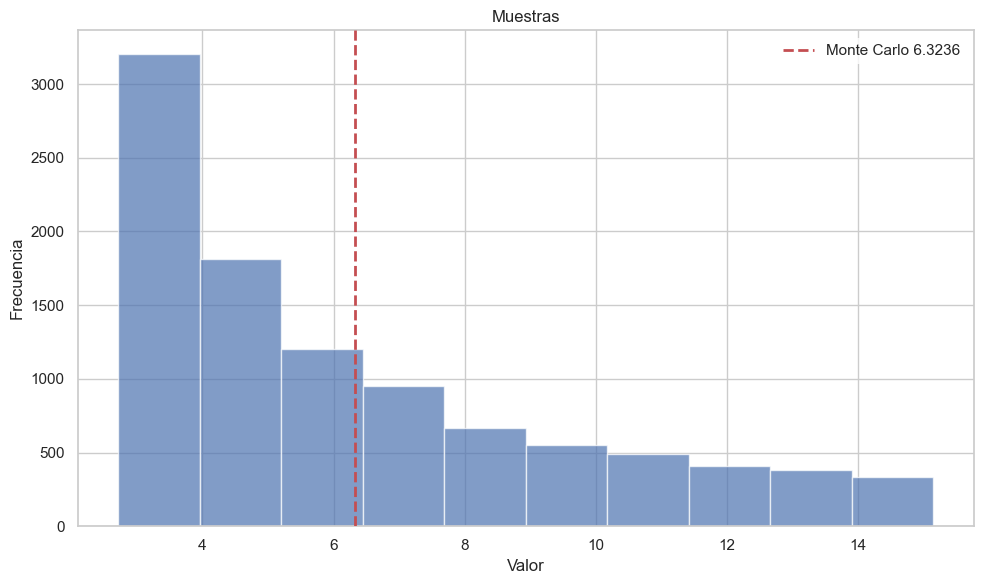

In [155]:
histograma(muestras, montecarlo, bins=10)

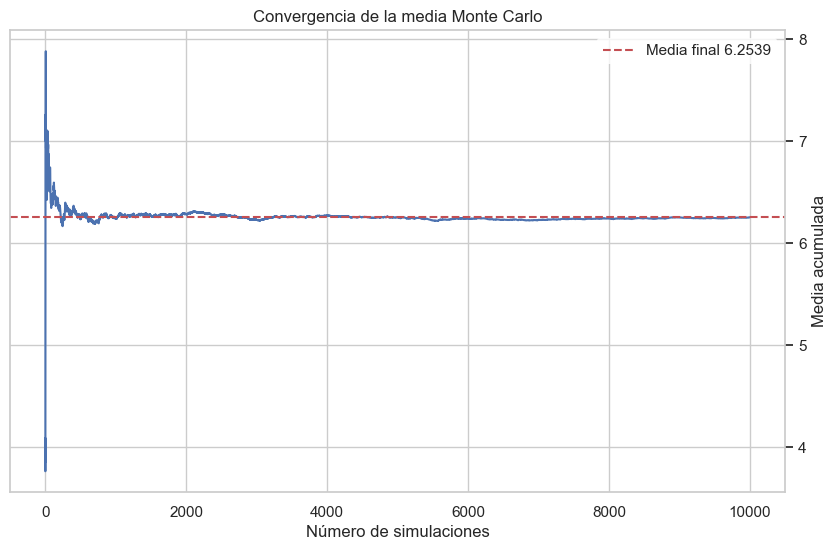

In [95]:
tlc(muestras)

# Ejercicio 5

$$\int_{-2}^{2} e^{x+x^2} \, dx$$


Sea
$$
\theta=\int_{-2}^{2} e^{x+x^2}\,dx.
$$

Cambio de variable a \([0,1]\):
$$
u=\frac{x-(-2)}{2-(-2)}=\frac{x+2}{4},\qquad x=-2+4u,\qquad dx=4\,du.
$$

Entonces
$$
\theta=\int_{0}^{1} 4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big]\,du.
$$

Forma de valor esperado con $U\sim\mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}\!\left[g(U)\right],\qquad
g(u)=4\,\exp\!\big[(-2+4u)+(-2+4u)^2\big].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} g(u_i),\qquad u_i\stackrel{iid}{\sim}\mathrm{Unif}(0,1).
$$


In [ ]:
def h(u):
    return (b-a)*np.exp(a+(b-a)*u + (a+(b-a)*u)**2)

k = 10000
a = -2
b = 2
u = np.random.random(k)

muestras = h(u)
montecarlo = muestras.mean()
montecarlo

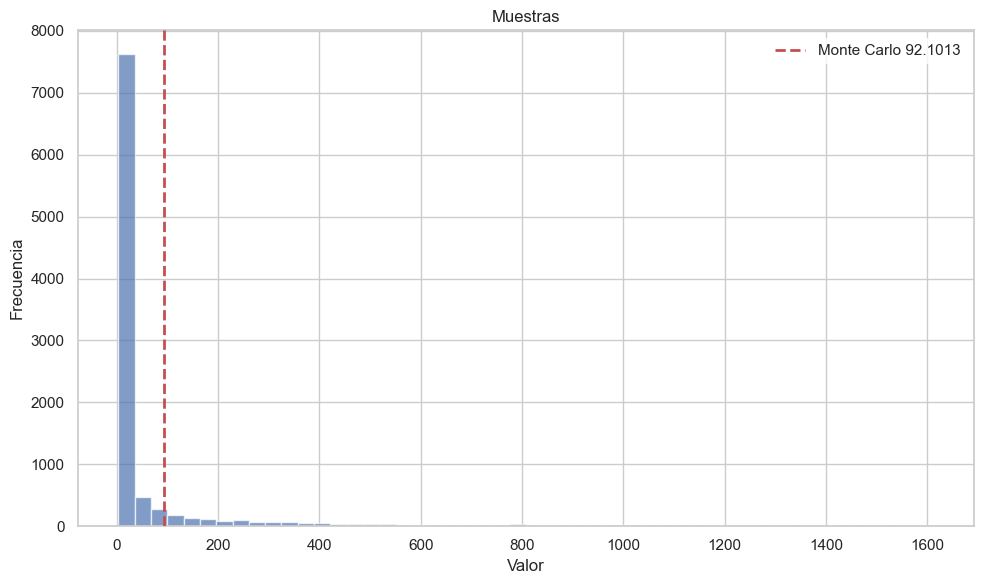

In [89]:
histograma(muestras, montecarlo)

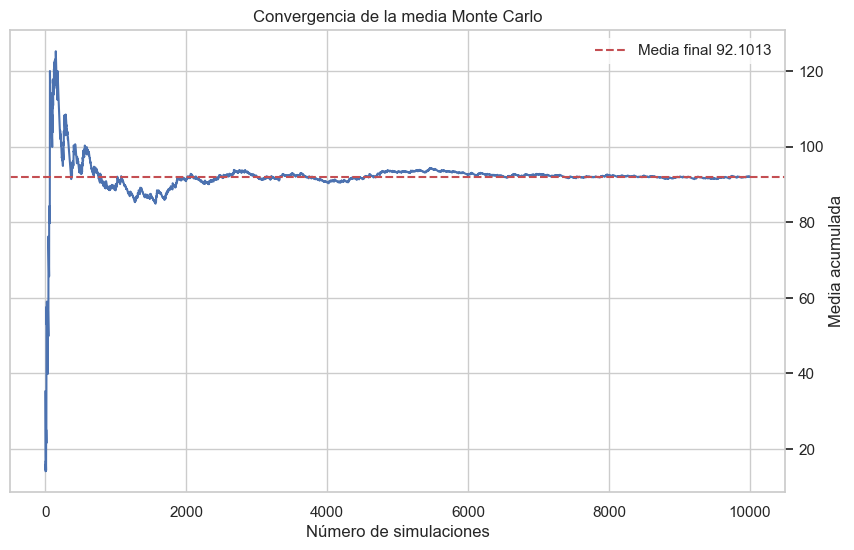

In [90]:
tlc(muestras)

# Ejercicio 7

$$\int_{0}^{\infty} \frac{x}{(1+x^2)^2} \, dx$$

Sea
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

Cambio: 
$$
y=\frac{1}{x+1},\qquad dy=-\frac{dx}{(x+1)^2}=-y^{2}\,dx.
$$
Entonces
$$
\theta=\int_{0}^{1} h(y)\,dy,\qquad 
h(y)=\frac{g\!\left(\tfrac{1}{y}-1\right)}{y^{2}},\quad 
g(x)=\frac{x}{(1+x^{2})^{2}}.
$$

Cálculo explícito de $h$:
$$
x=\frac{1-y}{y}
\;\Rightarrow\;
h(y)=\frac{(1-y)\,y}{\big(1-2y+2y^{2}\big)^{2}},\qquad y\in(0,1).
$$

Forma de esperanza con $U\sim \mathrm{Unif}(0,1)$:
$$
\theta=\mathbb{E}[\,h(U)\,].
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_K=\frac{1}{K}\sum_{i=1}^{K} h(u_i),
\quad u_i\stackrel{\text{iid}}{\sim}\mathrm{Unif}(0,1).
$$


In [ ]:
def h(u):
    return ((((1/u)-1)/(1+((1/u)-1)**2)**2))/(u**2)

k = 10_000

u = np.random.random(k)
muestras = h(u)
montecarlo = muestras.mean()
montecarlo

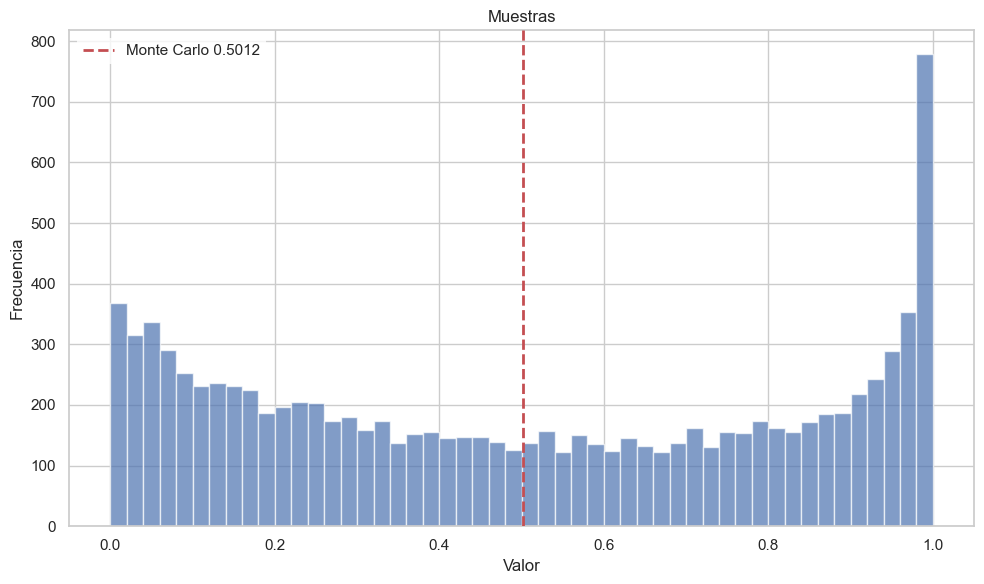

In [102]:
histograma(muestras, montecarlo)

Sea
$$
\theta=\int_{0}^{\infty}\frac{x}{(1+x^2)^2}\,dx.
$$

Integral impropia:
$$
\theta=\lim_{b\to\infty}\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx.
$$

Sustitución $u=1+x^2\Rightarrow du=2x\,dx$:
cuando $x=0\Rightarrow u=1$, cuando $x=b\Rightarrow u=1+b^2$.
Entonces
$$
\int_{0}^{b}\frac{x}{(1+x^2)^2}\,dx
=\frac12\int_{1}^{\,1+b^2} u^{-2}\,du.
$$

Primitiva:
$$
\int u^{-2}\,du=-u^{-1}+C.
$$

Evaluación:
$$
\frac12\Big[-u^{-1}\Big]_{1}^{\,1+b^2}
=\frac12\!\left(-\frac{1}{1+b^2}+1\right).
$$

Límite:
$$
\theta=\lim_{b\to\infty}\frac12\!\left(1-\frac{1}{1+b^2}\right)
=\frac12.
$$

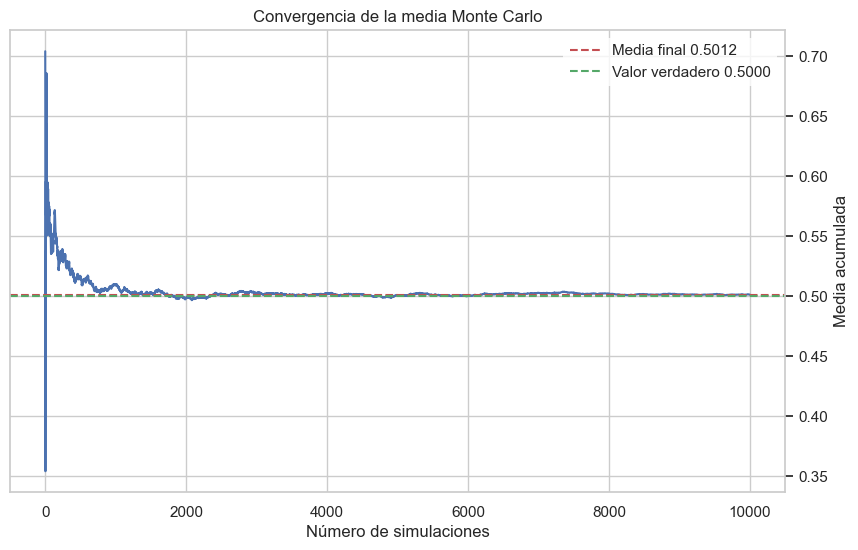

In [101]:
tlc(muestras, 1/2)

# Ejercicio 9


$$\int_{0}^{1} \int_{0}^{1} e^{(x+y)^2} \, dy \, dx$$



Sea
$$
\theta=\int_{0}^{1}\!\!\int_{0}^{1} e^{(x+y)^2}\,dy\,dx.
$$

Entonces  
$$
\theta=\int_{0}^{1}\!\!\int_{0}^{1} g(x_1,x_2)\,dx_1\,dx_2,
\qquad g(x_1,x_2)=e^{(x_1+x_2)^2}.
$$

Sabemos que: 
$$
\theta=\mathbb{E}\big[g(U_1,U_2)\big],
\quad U_1,U_2\stackrel{iid}{\sim}\mathrm{Unif}(0,1). \;\; 
$$

Estimador Monte Carlo:
$$
\widehat{\theta}_k=\frac{1}{k}\sum_{i=1}^{k} g(u_{i1},u_{i2})
=\frac{1}{k}\sum_{i=1}^{k} \exp\!\big((u_{i1}+u_{i2})^{2}\big),
\quad (u_{i1},u_{i2})\stackrel{iid}{\sim}\mathrm{Unif}(0,1).
$$

In [ ]:
def h(u1, u2):
    return np.exp((u1 + u2)**2)

k = 10000

u1 = np.random.random(k)
u2 = np.random.random(k)
muestras = h(u1, u2)
montecarlo = muestras.mean()
montecarlo

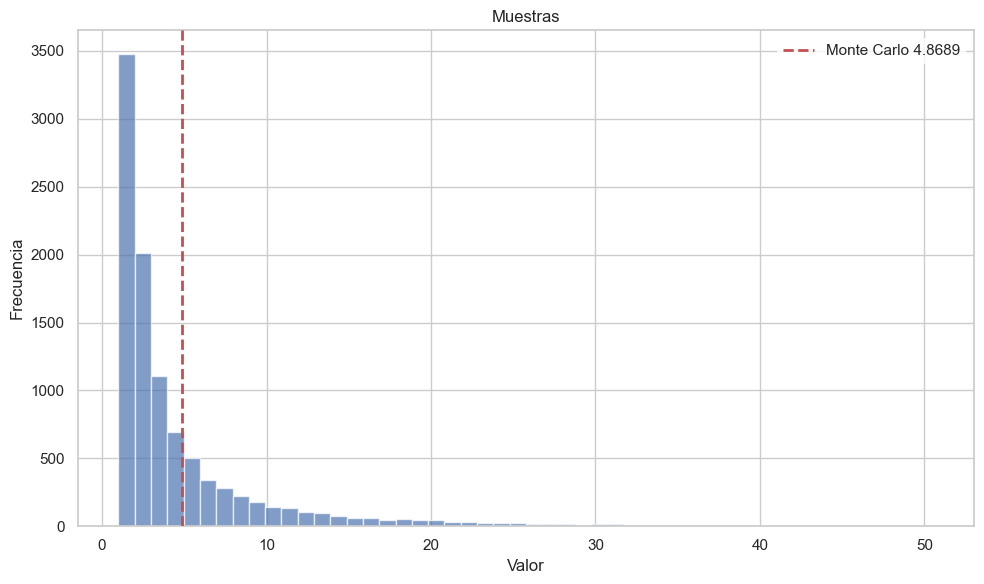

In [104]:
histograma(muestras, montecarlo)

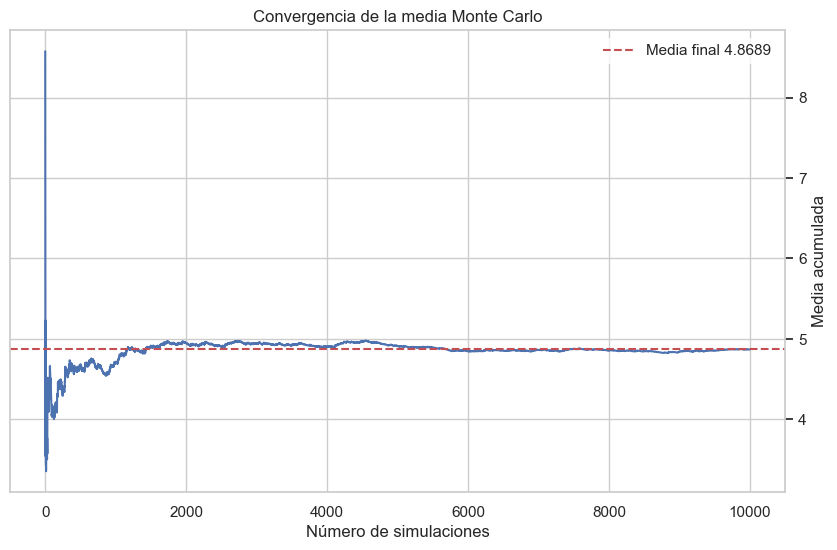

In [105]:
tlc(muestras)

# Ejercicio 11

Usar simulación para aproximar $\operatorname{{Cov}}(U, e^U)$, donde $U \sim \mathcal U(0,1)$.
Comparar con la respuesta exacta.

Asumo $U\sim\mathrm{Unif}(0,1)$.

Por definición,

$$
\operatorname{Cov}(X,Y)=\mathbb{E}\big[(X-\mathbb{E}X)(Y-\mathbb{E}Y)\big].
$$

Expansión lineal:

$$
\operatorname{Cov}(X,Y)=\mathbb{E}[XY]-\mathbb{E}[X]\;\mathbb{E}[Y].
$$

Aplicando a $X=U$ y $Y=e^{U}$:

$$
\operatorname{Cov}(U,e^{U})=\mathbb{E}\!\big[U e^{U}\big]-\mathbb{E}[U]\;\mathbb{E}[e^{U}].
$$




## Cálculo analítico


### $\mathbb{E}[U]$

$$
\int_{0}^{1}u\,du=\left[\frac{u^{2}}{2}\right]_{0}^{1}
=\frac{1^{2}}{2}-\frac{0^{2}}{2}=\frac12.
$$

### $\mathbb{E}[e^{U}]$

$$
\int_{0}^{1}e^{u}\,du=\left[e^{u}\right]_{0}^{1}
=e^{1}-e^{0}=e-1.
$$

### $\mathbb{E}[Ue^{U}]$ (por partes)


$$
\int_{0}^{1} x\,e^{x}\,dx,\qquad
\begin{cases}
u=x &\Rightarrow\ du=dx,\\[2pt]
dv=e^{x}\,dx &\Rightarrow\ v=e^{x}.
\end{cases}
$$


$$
\int_a^b u\,dv=\Big[u\,v\Big]_a^b-\int_a^b v\,du.
$$


$$
\Big[x\,e^{x}\Big]_{0}^{1}-\int_{0}^{1} e^{x}\,dx
=\big(1\cdot e-0\cdot 1\big)-\Big[e^{x}\Big]_{0}^{1}
=e-(e-1)=1.
$$



### Covarianza

$$
\operatorname{Cov}(U,e^{U})=\mathbb{E}[Ue^{U}]-\mathbb{E}[U]\mathbb{E}[e^{U}]
=1-\frac12\,(e-1)=\frac{3-e}{2} = 0.140859086
$$




## Estimación Monte Carlo

Sea $u_1,\dots,u_K\stackrel{iid}{\sim}\mathrm{Unif}(0,1)$. Entonces

$$
\widehat{\mu}_U=\frac{1}{K}\sum_{i=1}^{K} u_i,\qquad
\widehat{\mu}_{e}=\frac{1}{K}\sum_{i=1}^{K} e^{u_i},\qquad
\widehat{m}=\frac{1}{K}\sum_{i=1}^{K} u_i e^{u_i}.
$$

Entonces:

$$
\;\widehat{\operatorname{Cov}}^{(MC)}=\widehat{m}-\widehat{\mu}_U\,\widehat{\mu}_{e}\;
$$

In [119]:
def valor_esperado_1(u):
    return u * np.exp(u)

def valor_esperado_2(u):
    return u

def valor_esperado_3(u):
    return np.exp(u)

k = 1000000

u = np.random.random(k)

montecarlo = valor_esperado_1(u).mean() - valor_esperado_2(u).mean() * valor_esperado_3(u).mean()

In [120]:
montecarlo

np.float64(0.1406986786630252)

In [121]:
1 - 1/2*(np.e -1)

0.14085908577047745

# Ejercicio 13

Para variables aleatorias uniformes $U_1, U_2, \ldots$ definir
$$N = \min\left\{ n : \sum_{i=1}^{n} U_i > 1 \right\}.$$
Estimar $\mathbb E[N]$ por simulación con:
a) 100 valores,  b) 1000 valores,  c) 10000 valores,  d) Discutir el valor esperado.



```text
PSEUDOCÓDIGO — MINIMO_N(k)
total_contadores ← 0
PARA i ← 1 HASTA k HACER:
    suma ← 0
    contador ← 0
    MIENTRAS suma < 1 HACER:
        contador ← contador + 1
        suma ← UNIFORME(0,1)
    total_contadores ← total_contadores + contador
RETORNAR total_contadores / k
```


In [123]:
def minimo_N(k):
    lista_contadores = []
    for _ in range(k):
        suma = 0
        contador = 0
        while suma < 1:
            contador += 1
            suma += np.random.random()
        lista_contadores.append(contador)
    return lista_contadores

## 100 valores

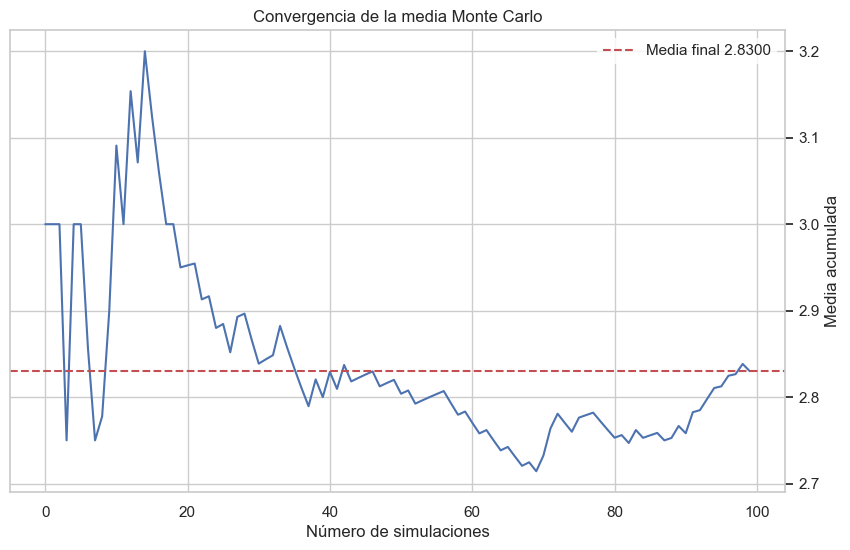

In [138]:
tlc(minimo_N(100))

## 1000 valores

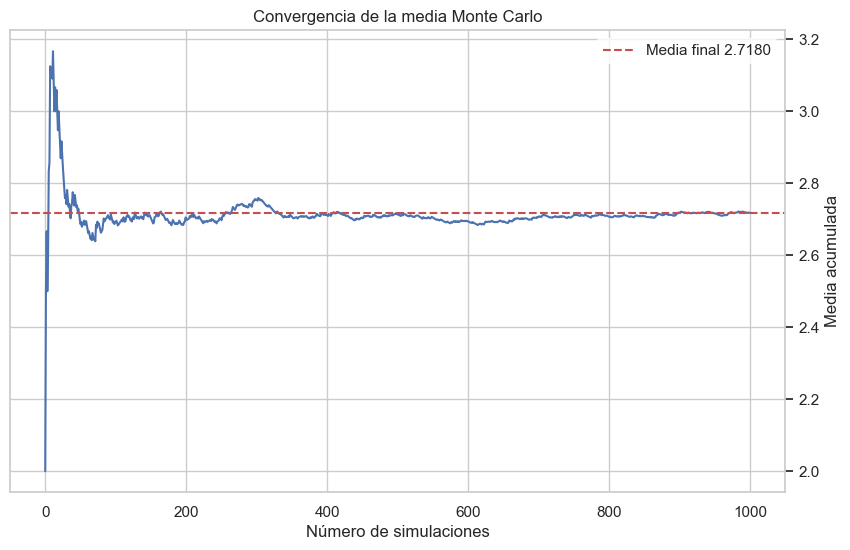

In [139]:
tlc(minimo_N(1000))

## 10000 valores

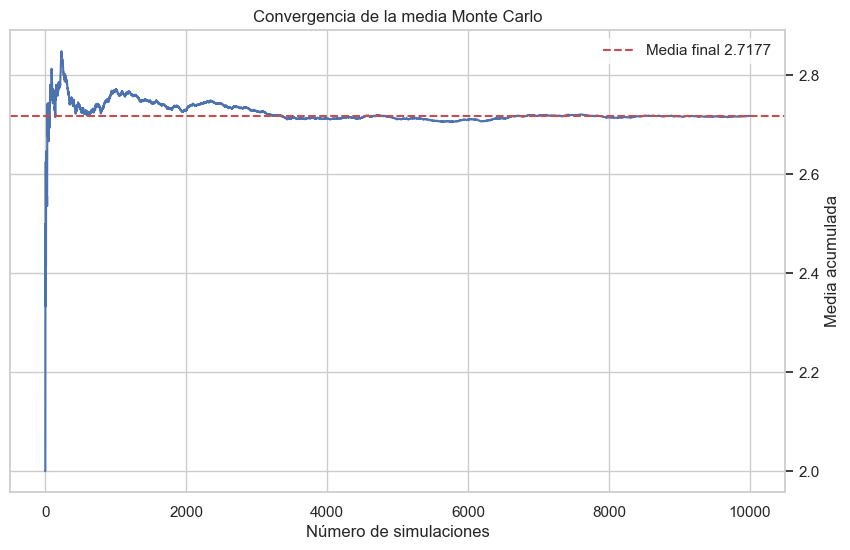

In [140]:
tlc(minimo_N(10000))

## Distribución de $n$

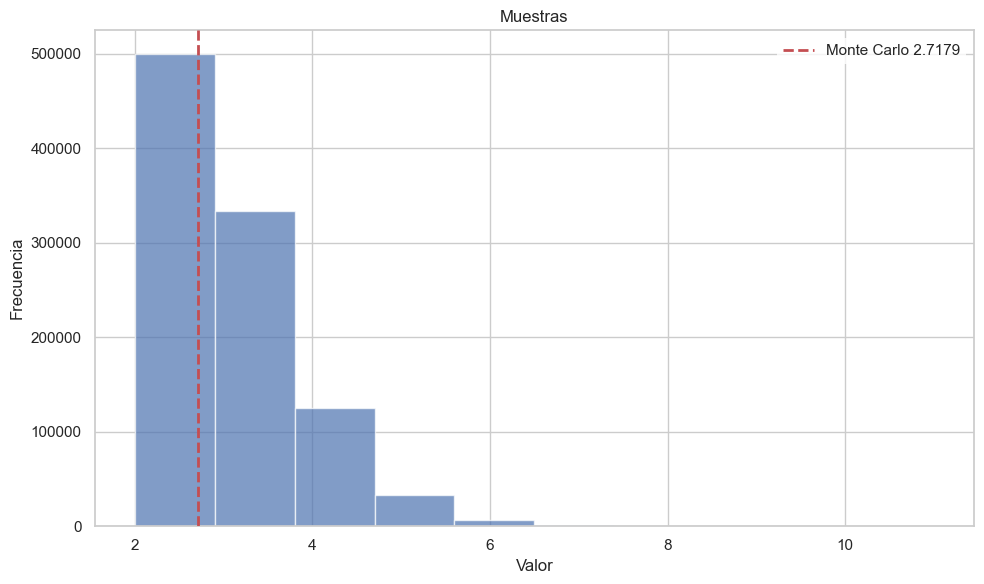

In [ ]:
muestras = minimo_N(1000000)
montecarlo = np.mean(muestras)
histograma(muestras, montecarlo, bins=10)